# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Fri May 30 15:31:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.24                 Driver Version: 566.24         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   43C    P8              2W /   63W |     493MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using Device: {device}')

2.7.0+cu118
Using Device: cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

The **3 areas** in industry where Computer Visison is currently being used are:
1. Self-Driving Cars.
2. Medical Imaging and Diagnosis.
3. Security.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

* **My Definition:** "Overfitting" in machine learning refers to the the situation where your model's parameters start to learn the exact representation of your trsaining data instead of a general representation of them, basically memorizing the training data and not learning to respond to unseen data.

* **Google's Definition:** "Overfitting" occurs when a model learns the training data too well, including noise and irrelevant details, to the point where it performs poorly on new, unseen data. Essentially, the model memorizes the training set rather than learning the underlying patterns, leading to high accuracy on the training data but low accuracy on new data. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* Techniques I´ve heard of:
1. **Early-Stopping:** Stop the training the moment the new validaiton_losses are greater than previous ones. That's a sign of the model starting to overfit. 
2. **Cross-Validation:** Train and Validate the model over folds of the training data, so that it can learn from different subsets, and enhance generalization. 
3. **Dropout:** Drop neurons at random so that the model is obligated to adapt and generalize better.

* ChatGPT's Techniques:
1. **Train with More Data:** Providing the model with more diverse examples helps it learn general patterns rather than specific ones.
2. **Data Augmentation:** Apply transformations to the training data (e.g., flips, rotations, noise) to artificially increase the dataset size and improve generalization.
3. **Early-Stopping:** Stop training when the validation loss starts increasing, even if the training loss is still decreasing. This indicates the model is starting to overfit the training data. `if val_loss > best_val_loss: --> stop_training = True`
4. **Regularization (L1/L2):** Add a penalty to the loss function based on the size of the model's weights to discourage overly complex models. L1 (Lasso encourages sparsity (weights close to zero)) and L2 (Ridge penalizes large weights).



## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Done!✅

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [27]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root='data', train=True, transform=ToTensor(), download=True, target_transform=None)
test_data = datasets.MNIST(root='data', train=False, transform=ToTensor(), download=True, target_transform=None)

print(f'train_data: {len(train_data)} samples.\ntest_data:  {len(test_data)} samples.')



train_data: 60000 samples.
test_data:  10000 samples.


## 6. Visualize at least 5 different samples of the MNIST training dataset.

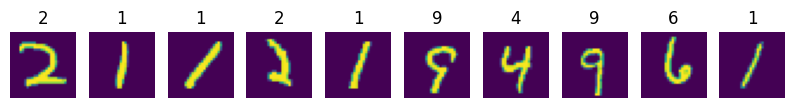

In [64]:
import matplotlib.pyplot as plt


# img, label = train_data[0]
# plt.imshow(img.squeeze()); plt.title(label)

n = 10
random_idxs = torch.randint(low=0, high=len(train_data), size=(1,n)).squeeze()

plt.figure(figsize=(10,1))
for i, idx in enumerate(random_idxs):
    img, target = train_data[idx]
    plt.subplot(1, n, i+1)
    plt.imshow(img.squeeze()); plt.title(target); plt.axis(False)



## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?